In [1]:
#1imports
import pandas as pd

In [2]:
#get data
df = pd.read_csv("demo.csv")
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
#2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))

In [4]:

from sklearn.cluster import KMeans
#dont use this
#kmeans = KMeans(n_clusters=2)

In [5]:
#kmeans.fit(scaled_df)

KMeans(n_clusters=2)

In [6]:
#kmeans.inertia_

2599.3844237836247

In [10]:
inertias = []
for cluster in range(1,100):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
frame = pd.DataFrame({"Clusters":range(1,100), "Inertias": inertias})

<AxesSubplot:xlabel='Clusters', ylabel='Inertias'>

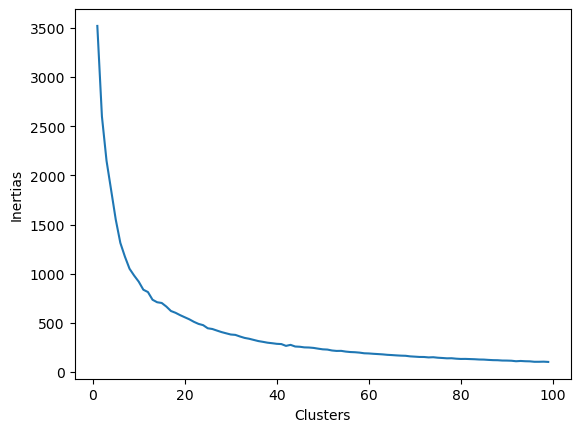

In [12]:
import seaborn as sns
sns.lineplot(data=frame, x="Clusters", y="Inertias")

In [13]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
predictions = kmeans.predict(scaled_df)

In [14]:
centers = kmeans.cluster_centers_

In [15]:
unscaled_centers = scaler.inverse_transform(centers)

In [16]:
unscaled_centers

array([[1.06521739e+00, 2.78260870e+00, 3.56063043e+04, 4.86071739e+03,
        5.51208696e+03, 9.96156522e+03, 8.89152174e+02, 2.65945652e+03],
       [2.00000000e+00, 2.66935484e+00, 7.61277419e+03, 8.95381452e+03,
        1.42798548e+04, 1.34579032e+03, 6.17832258e+03, 1.53925806e+03],
       [1.00000000e+00, 3.00000000e+00, 9.13300581e+03, 2.98302326e+03,
        3.44018023e+03, 2.23576744e+03, 7.72395349e+02, 9.99744186e+02],
       [1.04651163e+00, 1.31395349e+00, 1.05175698e+04, 3.20875581e+03,
        4.12831395e+03, 3.13667442e+03, 8.68186047e+02, 1.06848837e+03],
       [1.00000000e+00, 3.00000000e+00, 3.68470000e+04, 4.39500000e+04,
        2.01700000e+04, 3.65340000e+04, 2.39000000e+02, 4.79430000e+04],
       [2.00000000e+00, 2.54545455e+00, 1.69110909e+04, 3.48643636e+04,
        4.61261818e+04, 3.24545455e+03, 2.30080909e+04, 4.17736364e+03]])